<a href="https://colab.research.google.com/github/yuktiverma43/Data-Science-Projects/blob/main/Git_Hub_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Project**

Build a model on training set and make prediction on test set whether the person survived or not.

Data Dictionary used in project:-
1. **survival:** Survival	with values 0 = No, 1 = Yes
2. **pclass:** socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
3. **sex:** Male and Female
4. **Age:** in years
5. **sibsp:** # of siblings / spouses aboard the Titanic
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
6. **parch:** # of parents / children aboard the Titanic
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
7. **ticket:** Ticket number
8. **fare**
9. **cabin:** Cabin number
10.**embarked:** Port of Embarkation with values	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train_set.csv')

In [ ]:
test_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_test_set.csv')

Checking the first five rows of train set

In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


checking the last five rows of train set

In [ ]:
train_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


checking the first five rows of test set

In [ ]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


checking the last five rows of test set

In [ ]:
test_set.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


As there is no survived column in test_set. Therefore  will make predictions for that.

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations**

Name, Sex, Cabin and Embarked are of object category and all other remaining columns are of int/float type.

In [ ]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Observations**

In train set, the mean age of passenger on titanic ship was 29 years while 25% of people are less than 20 years old, 50% are less than 28 years old, 75% are less than 38 years old and maximum age of passenger on ship was 80 years old.

The mean fare is 32 USD and maximum fare was 512 USD.

In [ ]:
train_set.shape

(891, 12)

**Observations**

Train set has 891 rows and 12 columns.

In [ ]:
test_set.shape

(418, 11)

**Observations**

Test set has 418 rows and 11 columns.

**Exploratory Data Analysis**

In [ ]:
train_set.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Observations**

As there are alot of missing values for cabin, therefore, we will drop this column.
There are also missing values present in age and embarked column.

In [ ]:
train_set.PassengerId.nunique()

891

**Observations**

There are total of 891 passengers present in train set.

In [ ]:
test_set.PassengerId.nunique()

418

In [ ]:
test_set_PassengerID=test_set['PassengerId'].copy()

**Observations**

There are total of 418 passengers present in test set. As passenger ID is unique, it means total passengers aboarded is equal to total of Passenger ID.

In [ ]:
train_set.drop('PassengerId', axis=1, inplace=True)

**Observations**

As Passenger ID is unique, therefore, will drop it from tarin and test set.

In [ ]:
test_set.drop('PassengerId', axis=1, inplace=True)

**Observations**

Cabin columns has many missing values, therefor, will drop this column.

In [ ]:
train_set.drop('Cabin', axis=1, inplace=True)

In [ ]:
test_set.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_set['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

**Observations**

The no of siblings/spouses abord the titanic as per train and test set are 0,1,2,3,4,5,8.

In [ ]:
test_set['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [ ]:
train_set['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
test_set['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

**Observations**

The no of parents/children abord the titanic as per train and test set are 0-6, 9.

**Missing value treatment**

In [ ]:
imp_most_frequent=SimpleImputer(missing_values=np.nan, strategy='most_frequent')


**Observations**

Missing values are treated with most frequent values of a column.

In [ ]:
train_set['Age']=imp_most_frequent.fit_transform(train_set[['Age']])
test_set['Age']=imp_most_frequent.fit_transform(test_set[['Age']])

NameError: name 'imp_most_frequent' is not defined

In [ ]:
train_set['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

**Observations**

The unique values of Embarked column are C = Cherbourg, Q = Queenstown, S = Southampton and nan.

In [ ]:
train_set['Embarked']=imp_most_frequent.fit_transform(train_set[['Embarked']]).ravel() #.ravel() converts 2D array into 1D array.
test_set['Embarked']=imp_most_frequent.fit_transform(test_set[['Embarked']]).ravel()

**Observations**

Here missing values are treated with most frequent value of Embarked column.

In [ ]:
train_set.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


**Observations**

Missing values of train set is treated.

In [ ]:
test_set.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [ ]:
test_set['Fare']=imp_most_frequent.fit_transform(test_set[['Fare']])

**Observations**

Fare column missing value is treated with the most frequent value of that column.

In [ ]:
test_set.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


**Observations**

Missing value of test set is treated.

**Function to plot histogram, boxplot and barplot.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15,10), kde=True, bins=None):
  f2, (ax_box2, ax_hist2)=plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': (0.25, 0.75)}, figsize=figsize)

  sns.boxplot(data=data,x=feature,ax=ax_box2, showmeans=True, color='violet')
  sns.histplot(data=data, x=feature, kde=kde, bins=bins, ax=ax_hist2) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
  ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')
  ax_hist2.axvline(data[feature].median(), color='black', linestyle='-')

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

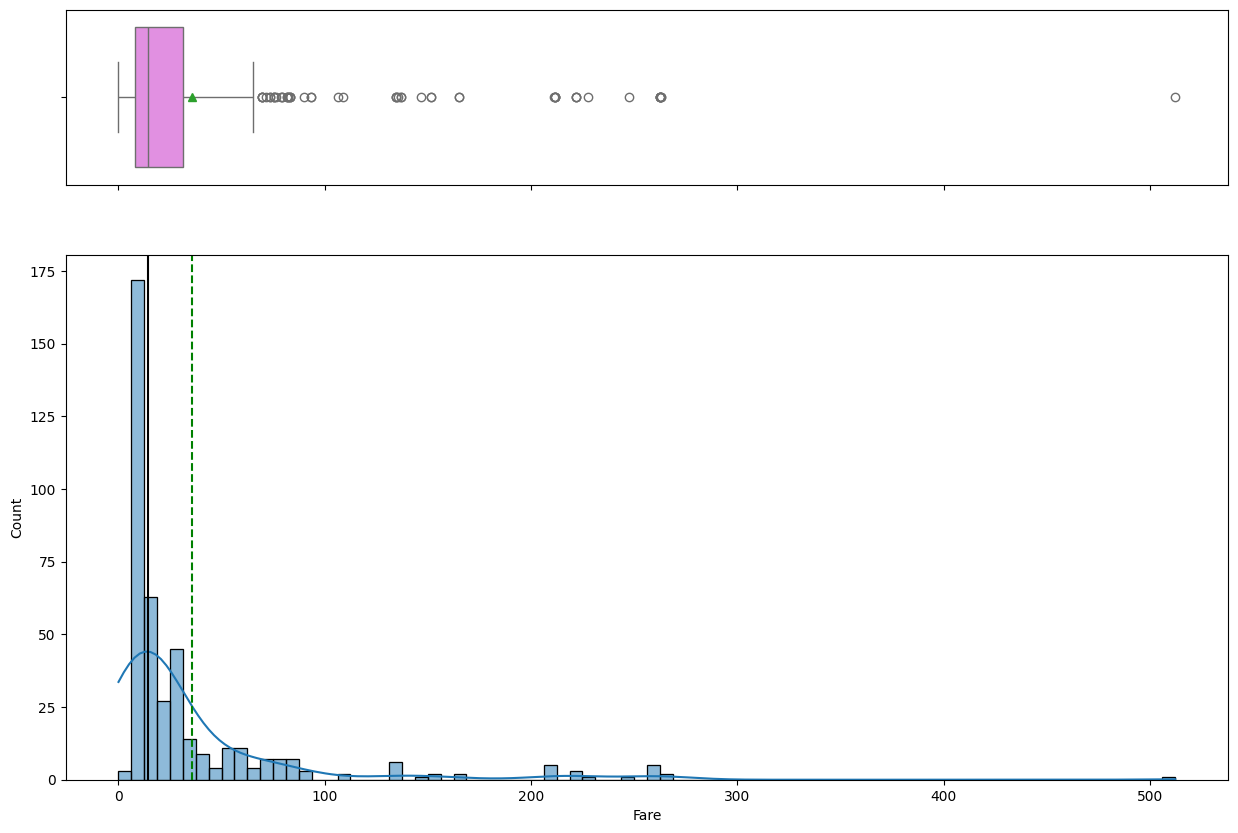

In [ ]:
histogram_boxplot(test_set,'Fare')

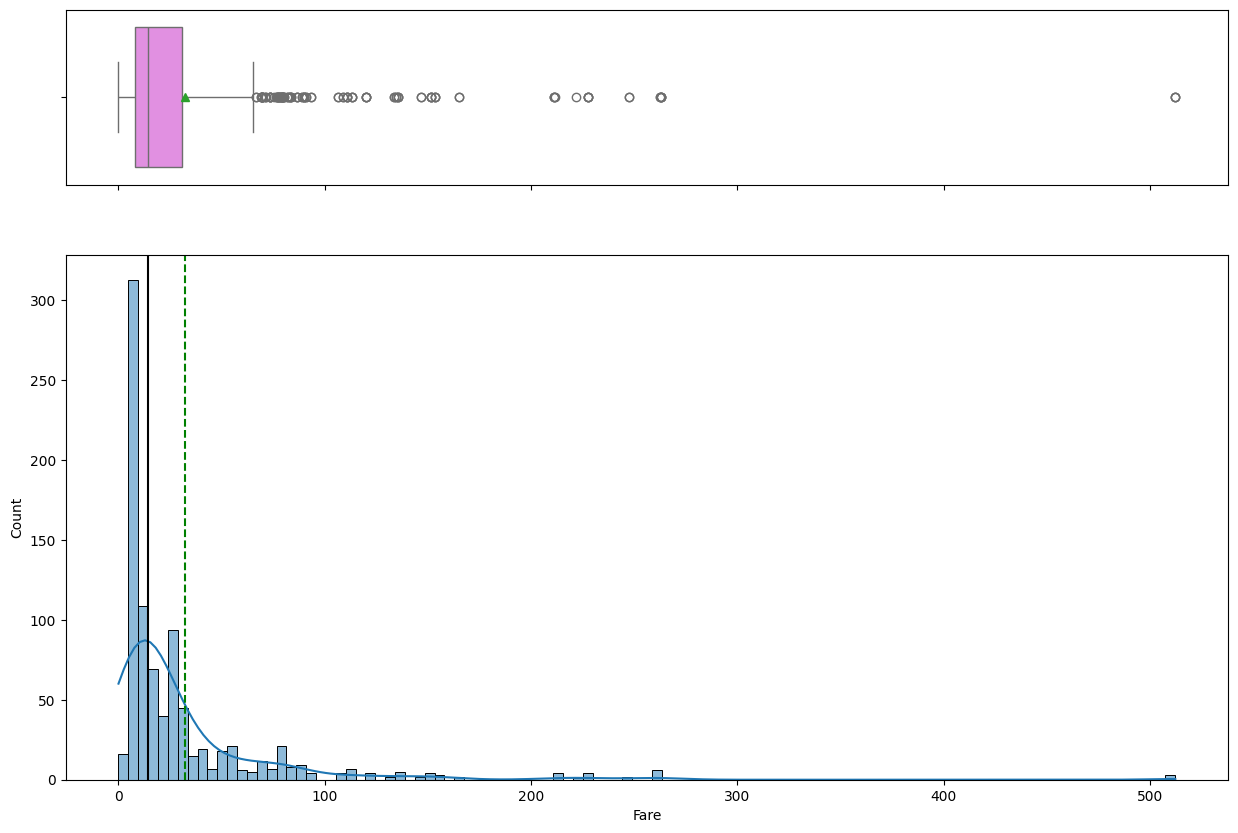

In [ ]:
histogram_boxplot(train_set,'Fare')

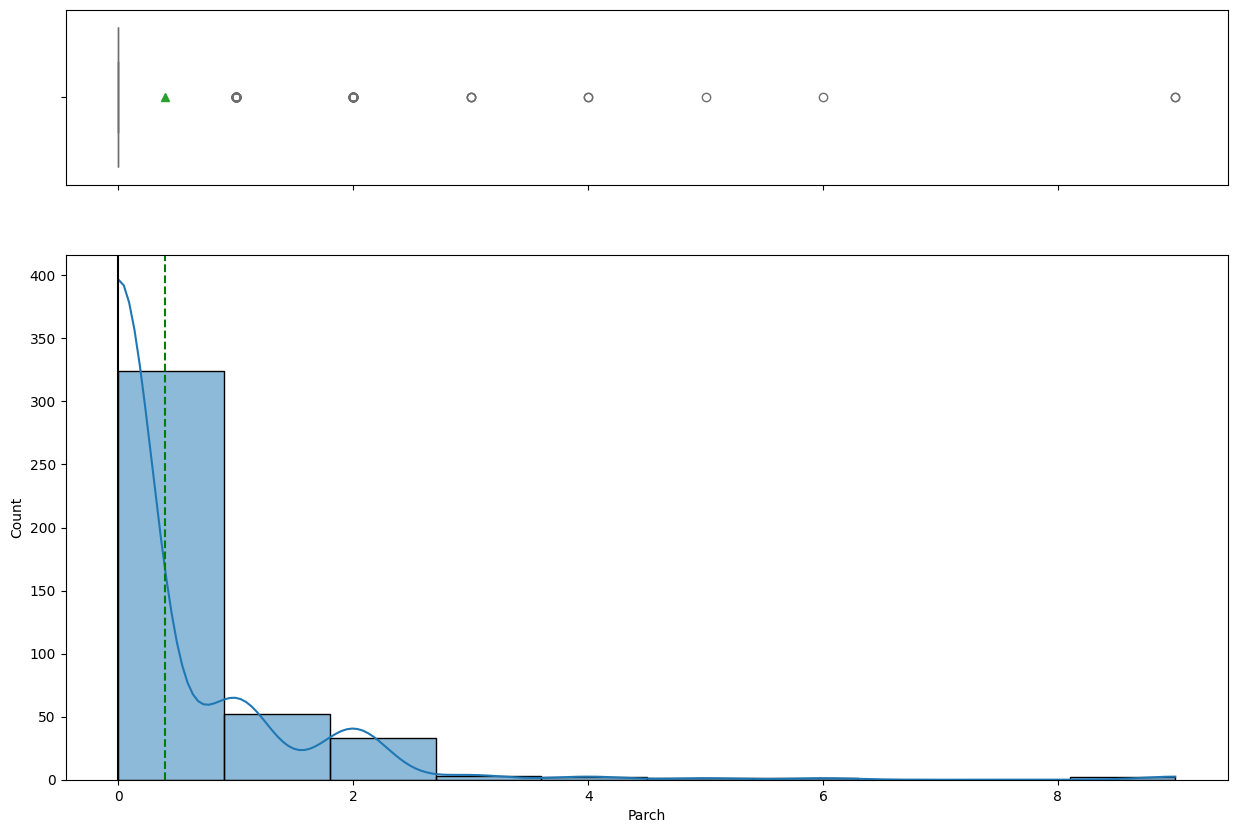

In [ ]:
histogram_boxplot(test_set,'Parch')

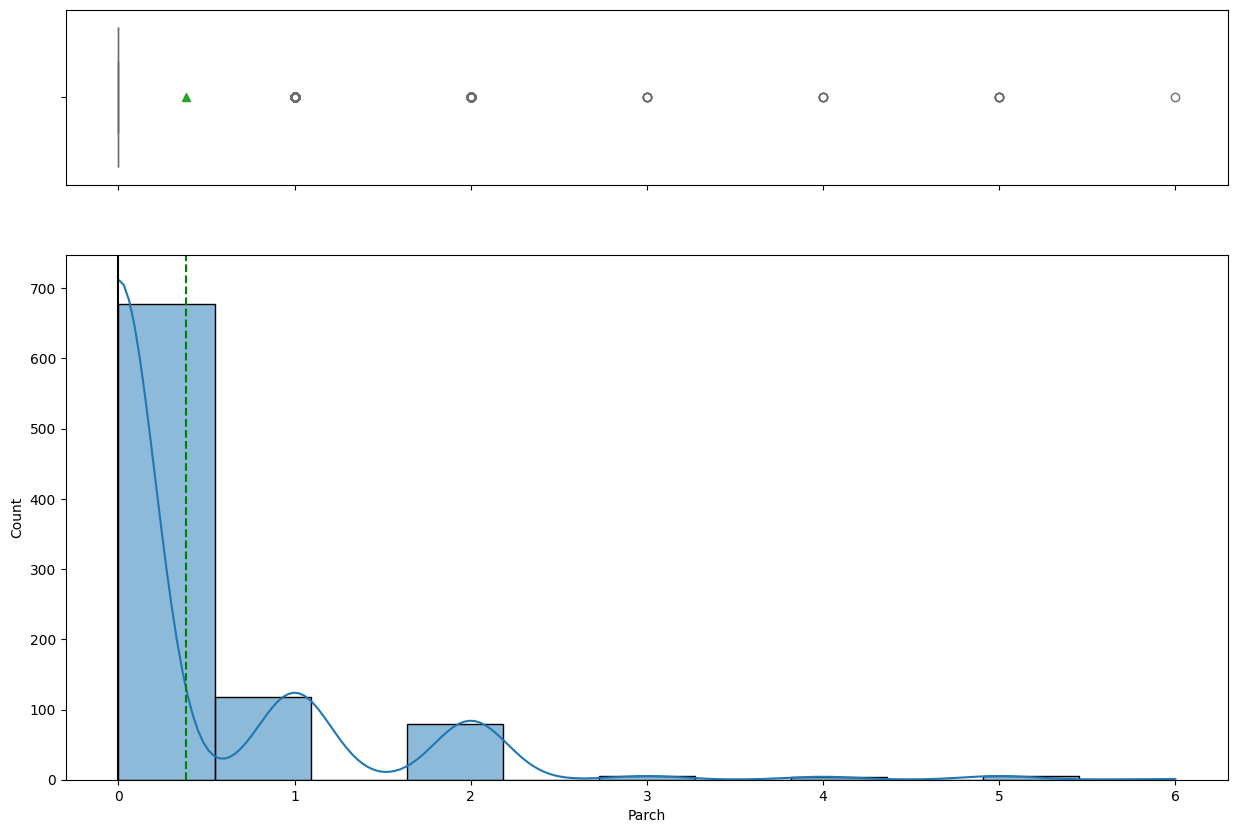

In [ ]:
histogram_boxplot(train_set,'Parch')

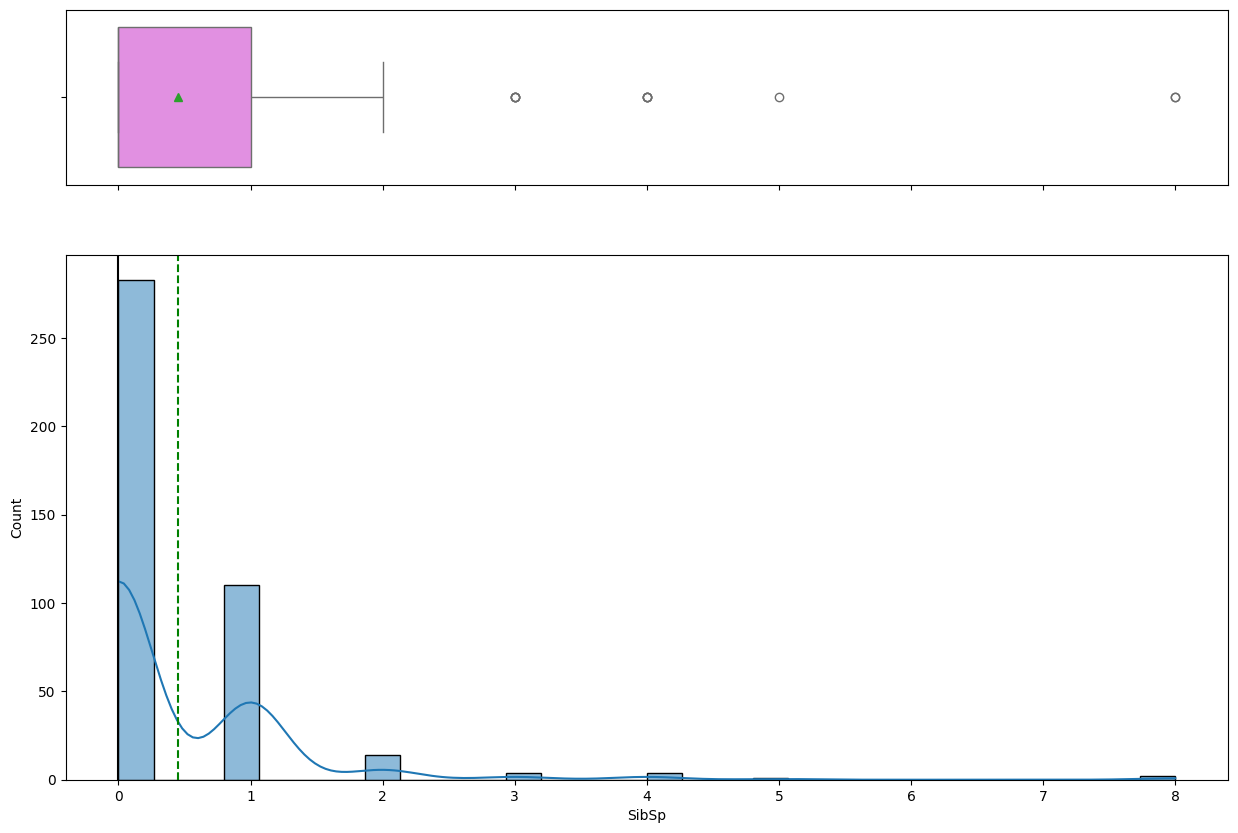

In [ ]:
histogram_boxplot(test_set,'SibSp')

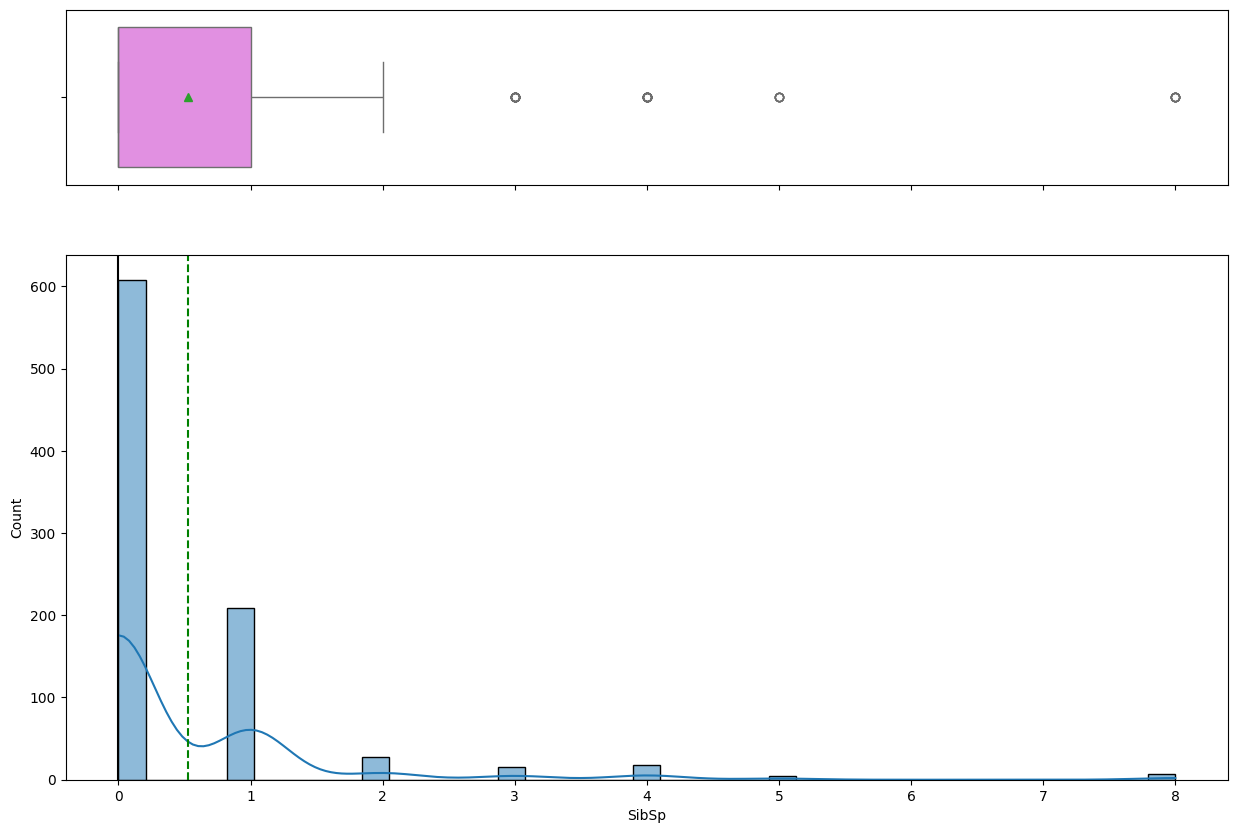

In [ ]:
histogram_boxplot(train_set,'SibSp')

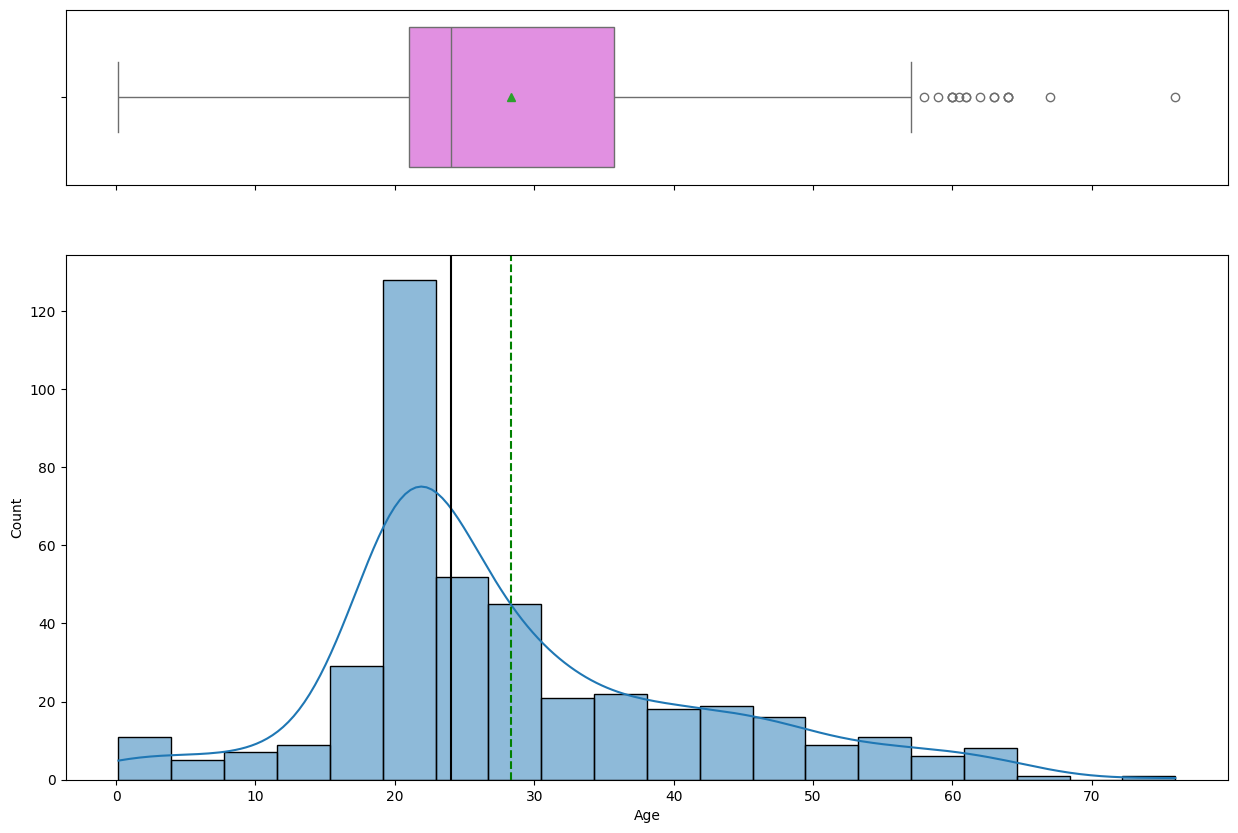

In [ ]:
histogram_boxplot(test_set,'Age')

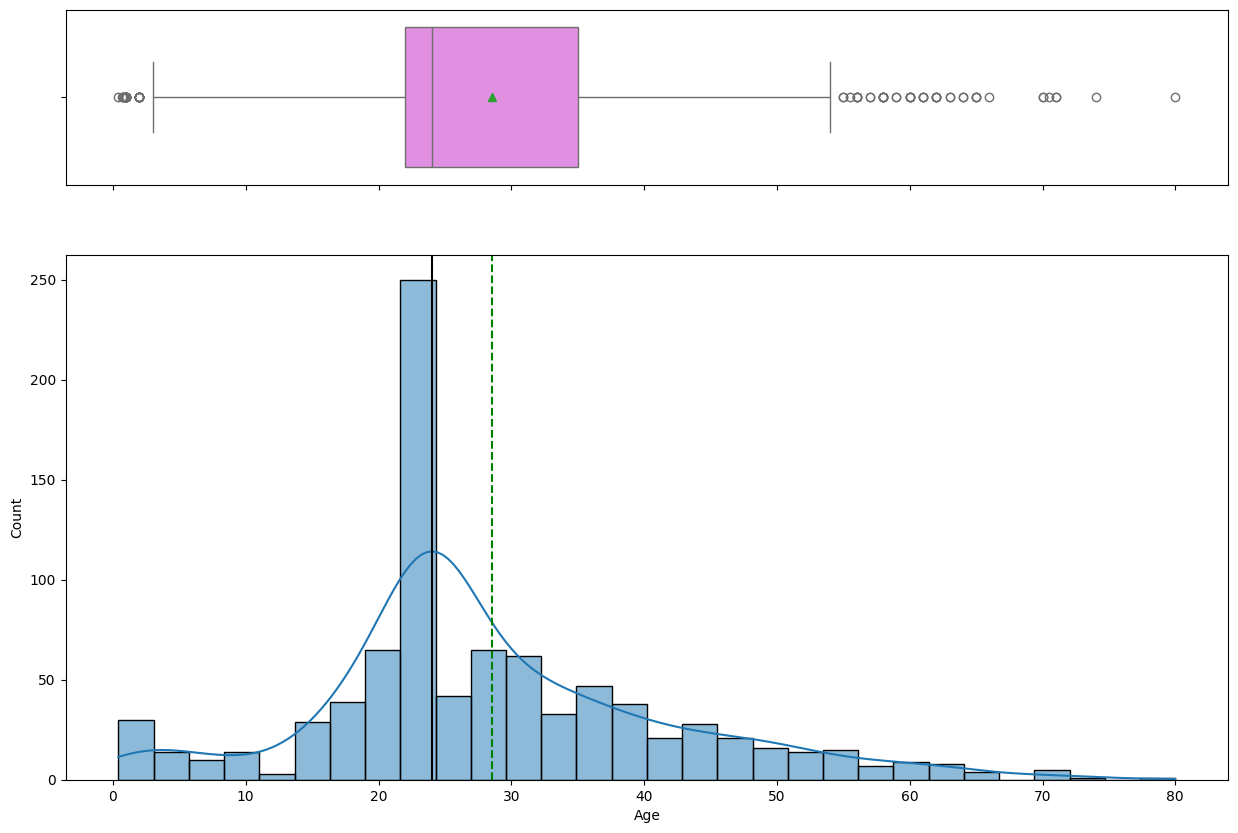

In [ ]:
histogram_boxplot(train_set,'Age')

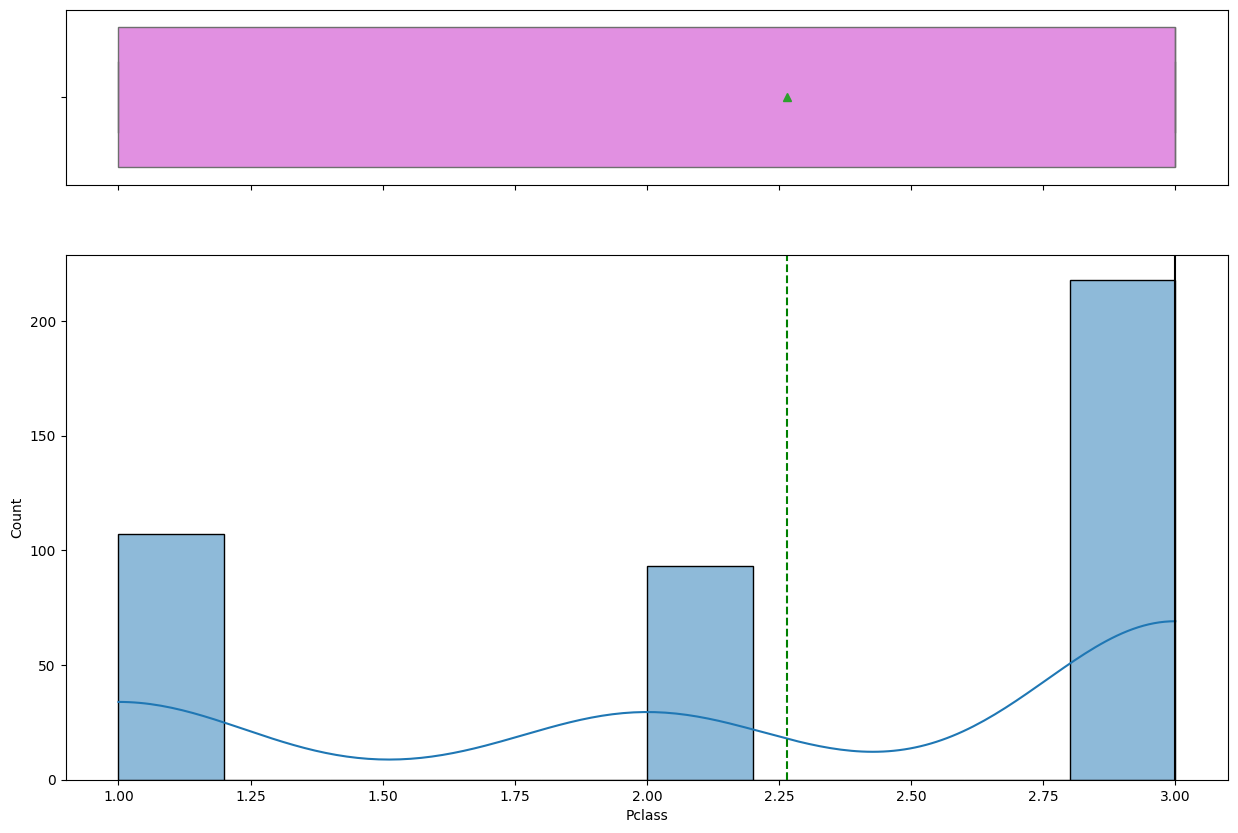

In [ ]:
histogram_boxplot(test_set,'Pclass')

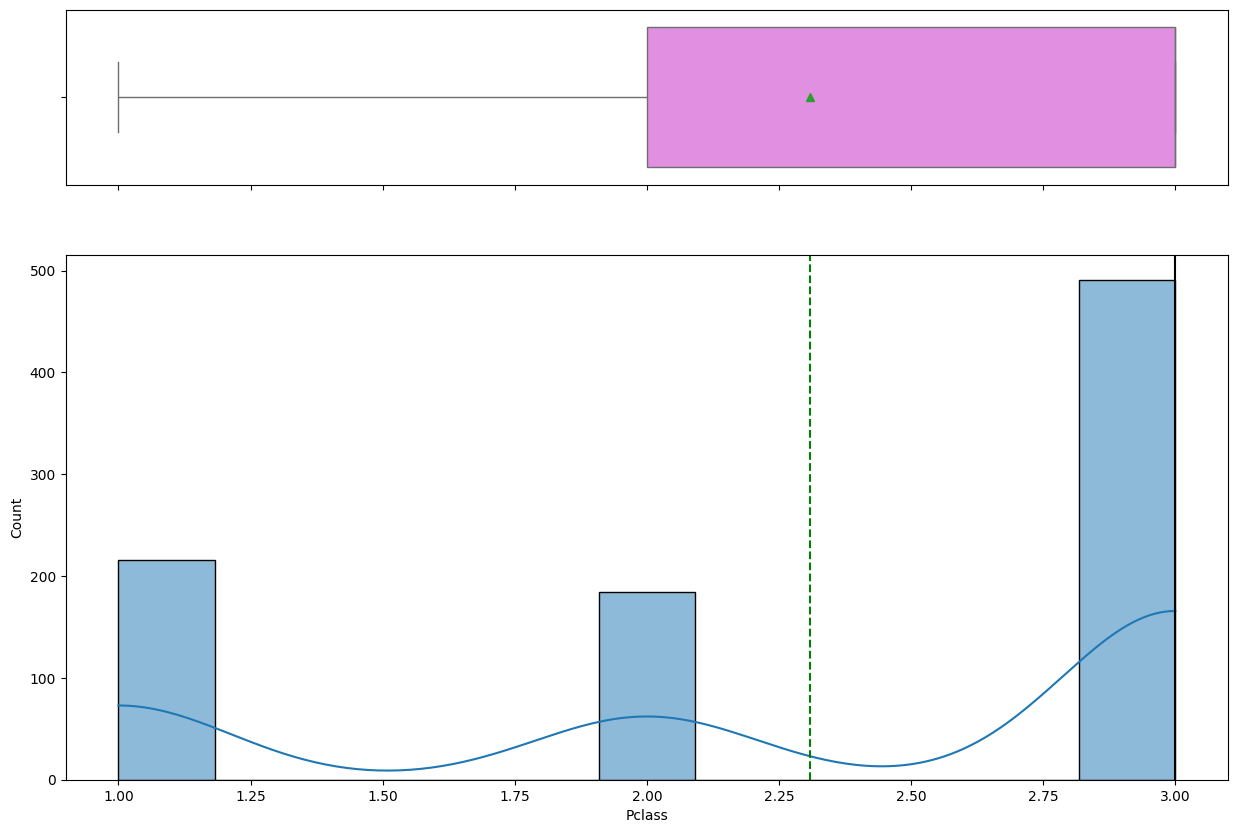

In [ ]:
histogram_boxplot(train_set,'Pclass')

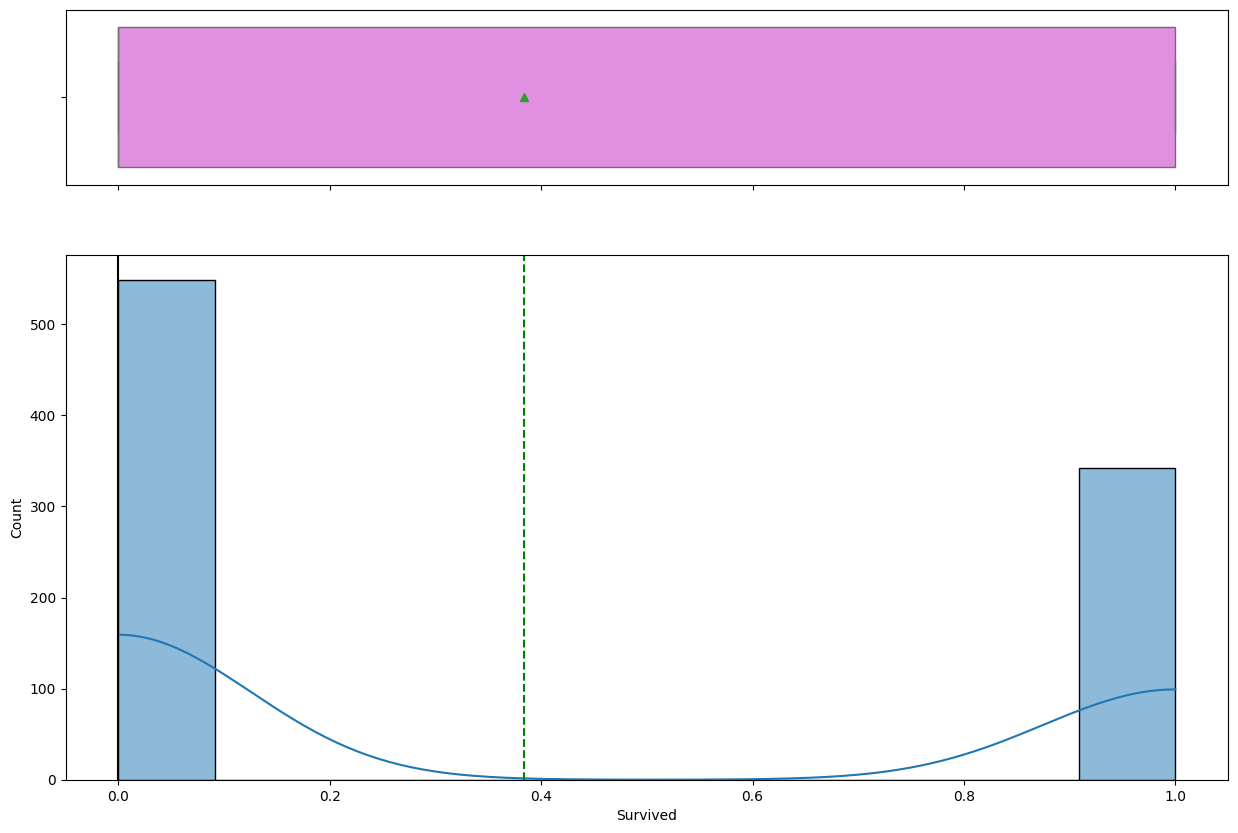

In [ ]:
histogram_boxplot(train_set,'Survived')

**Observations**

There are outliers present in varaibles of train set and test set and none of the histogram shows normal distribution except age column.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


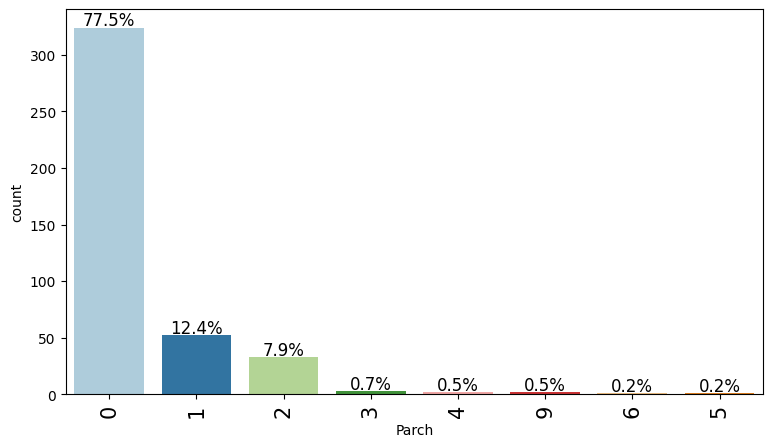

In [ ]:
labeled_barplot(test_set, 'Parch', perc=True)

**Observations**

As per barplot in test set, 77.5% of passengers were without parents/children. 12.4% were with 1 parent/children, 7.9% were with 2 parents/children.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


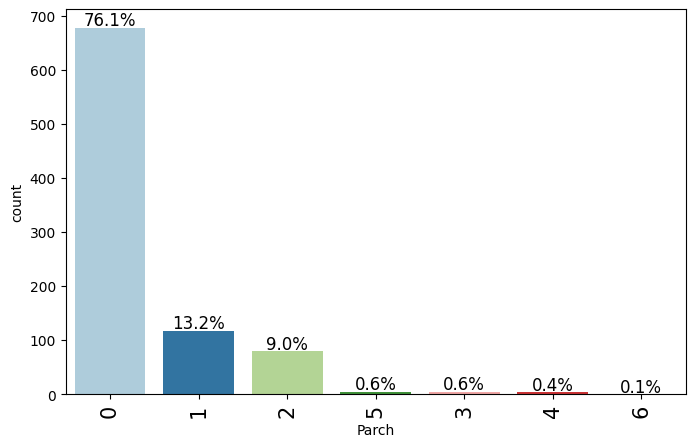

In [ ]:
labeled_barplot(train_set, 'Parch', perc=True)

**Observations**

As per barplot in train set, 76.1% of passengers were without parents/children. 13.2% were with 1 parent/children, 9% were with 2 parents/children.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


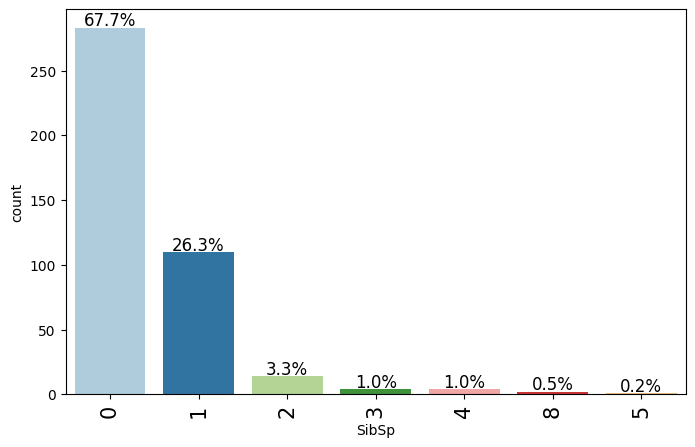

In [ ]:
labeled_barplot(test_set, 'SibSp', perc=True)

**Observations**

As per barplot in test set, 67.7% of passengers were without siblings/spouses. 26.3% were with 1 siblings/spouses, 3.2% were with 2 siblings/spouses, 1% were with 3 and 4 siblings/spouses.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


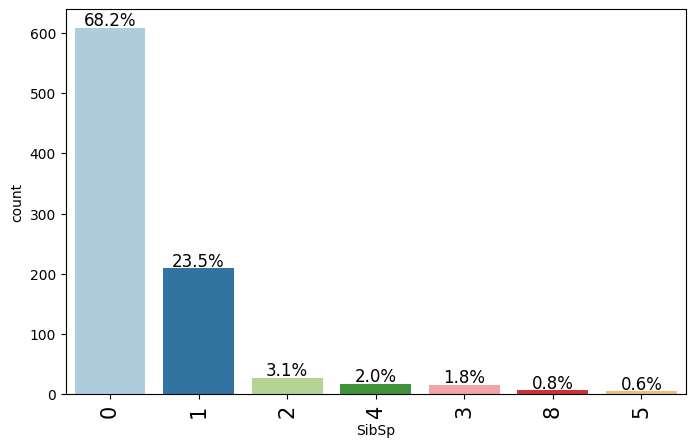

In [ ]:
labeled_barplot(train_set, 'SibSp', perc=True)

**Observations**

As per barplot in train set, 68.2% of passengers were without siblings/spouses. 23.5% were with 1 siblings/spouses, 3.1% were with 2 siblings/spouses, 2% were with 3 and 1.8% were with 4 siblings/spouses.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


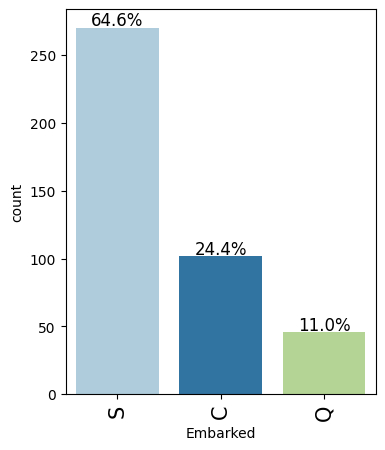

In [ ]:
labeled_barplot(test_set, 'Embarked', perc=True)

**Observations**

As per barplot in test set, 64.6% embarked from Southampton port, 24.4% embarked from Cherbourg port and 11% embarked from Queenstown port.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


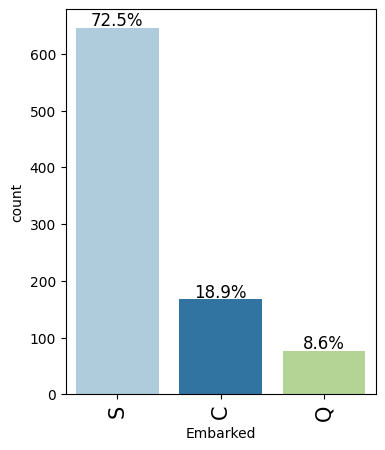

In [ ]:
labeled_barplot(train_set, 'Embarked', perc=True)

**Observations**

As per barplot in train set, 72.5% embarked from Southampton port, 18.9% embarked from Cherbourg port and 8.6% embarked from Queenstown port.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


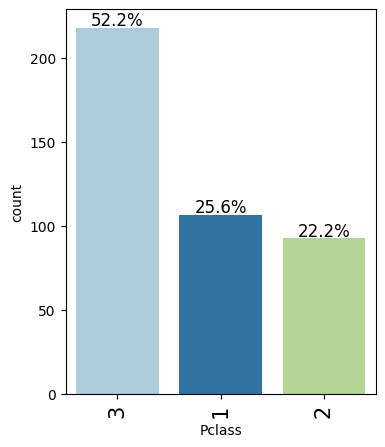

In [ ]:
labeled_barplot(test_set, 'Pclass', perc=True)

**Observations**

As per barplot in test set, 52.2% passenger belongs to lower socio economic status, 25.6% belongs to upper status and 22.2% belongs to middle status.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


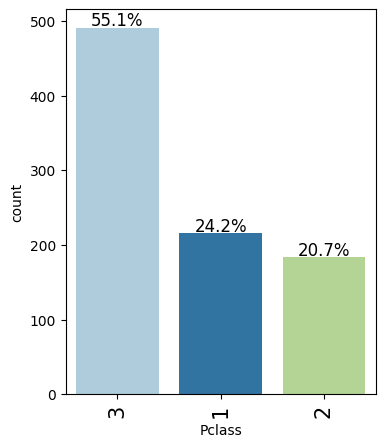

In [ ]:
labeled_barplot(train_set, 'Pclass', perc=True)

**Observations**

As per barplot in train set, 52.1% passenger belongs to lower socio economic status, 24.2% belongs to upper status and 20.7% belongs to middle status.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


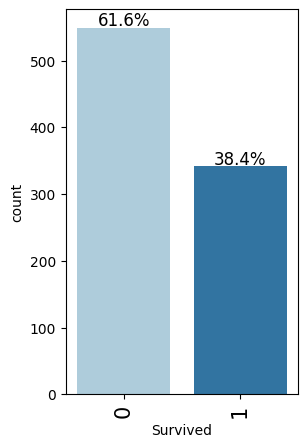

In [ ]:
labeled_barplot(train_set, 'Survived', perc=True)

**Observations**

As per barplot in test set, 61.6% does not survive and 38.4% survived.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


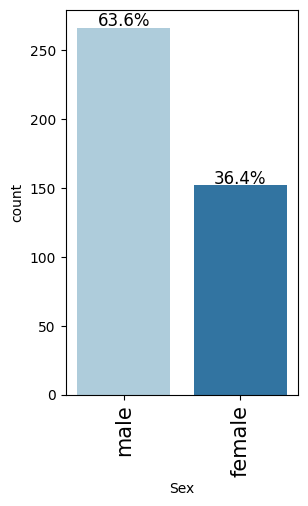

In [ ]:
labeled_barplot(test_set, 'Sex', perc=True)

**Observations**

As per barplot in test set, 63.6% passengers were male and 36.4% were females.

<ipython-input-62-61446a186199>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


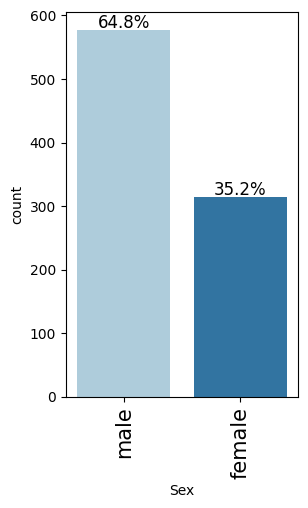

In [ ]:
labeled_barplot(train_set, 'Sex', perc=True)

**Observations**

As per barplot in train set, 64.8% passengers were male and 35.2% were females.

<Axes: >

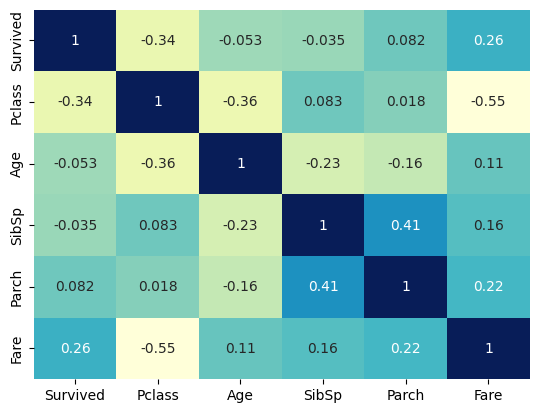

In [ ]:
col=train_set.select_dtypes(include=np.number).columns
sns.heatmap(train_set[col].corr(), annot=True,cmap='YlGnBu', cbar=False)

**Observations**

There is no positive relationship between two variables.

<Axes: >

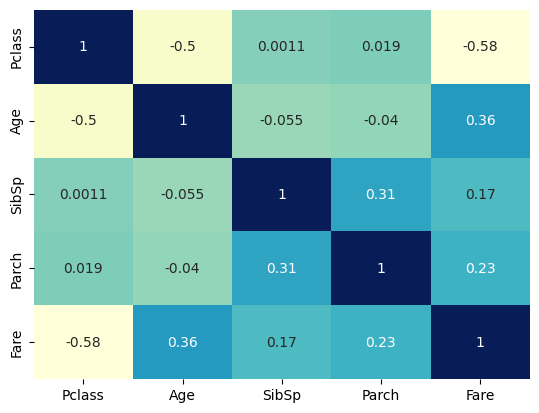

In [ ]:
cols=test_set.select_dtypes(include=np.number).columns
sns.heatmap(test_set[cols].corr(), annot=True,cmap='YlGnBu', cbar=False)

**Observations**

There is no positive relationship between two variables.

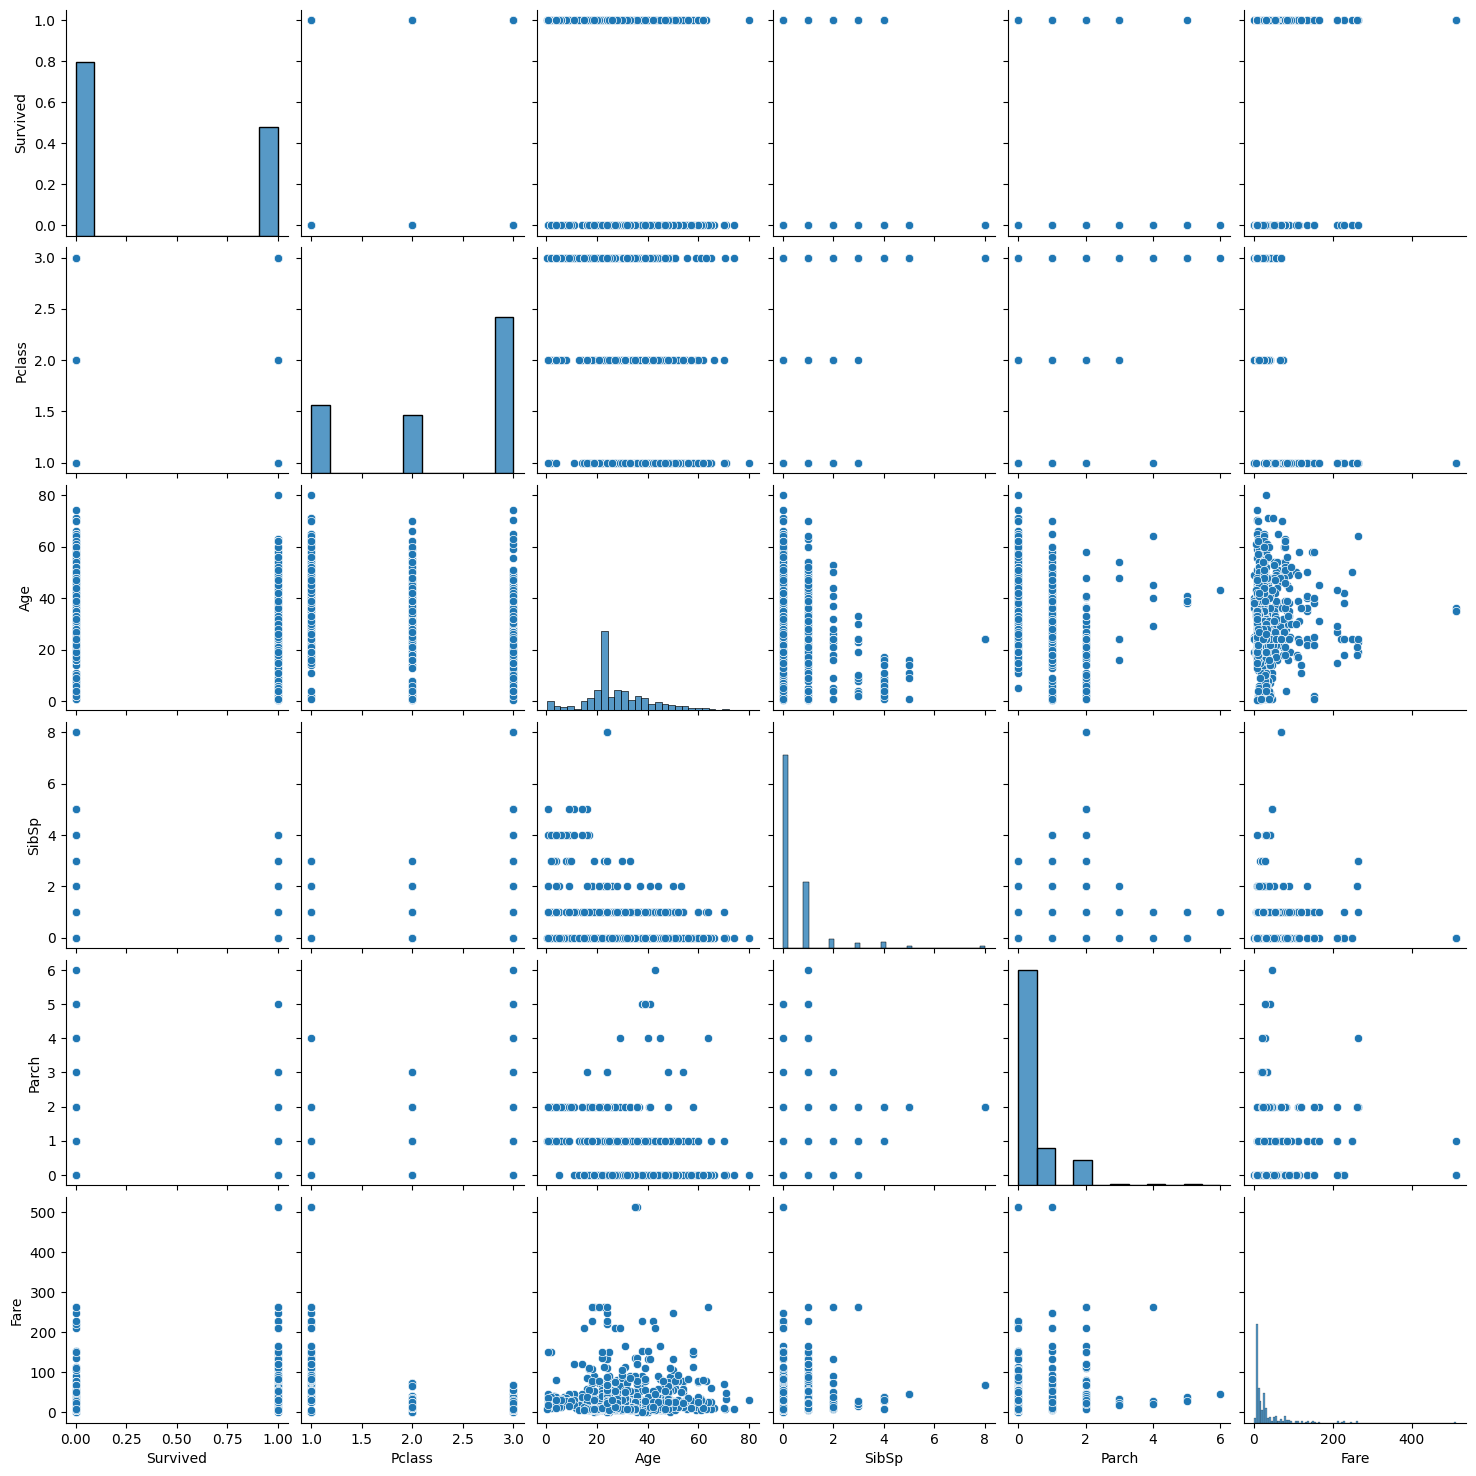

In [ ]:
sns.pairplot(train_set)

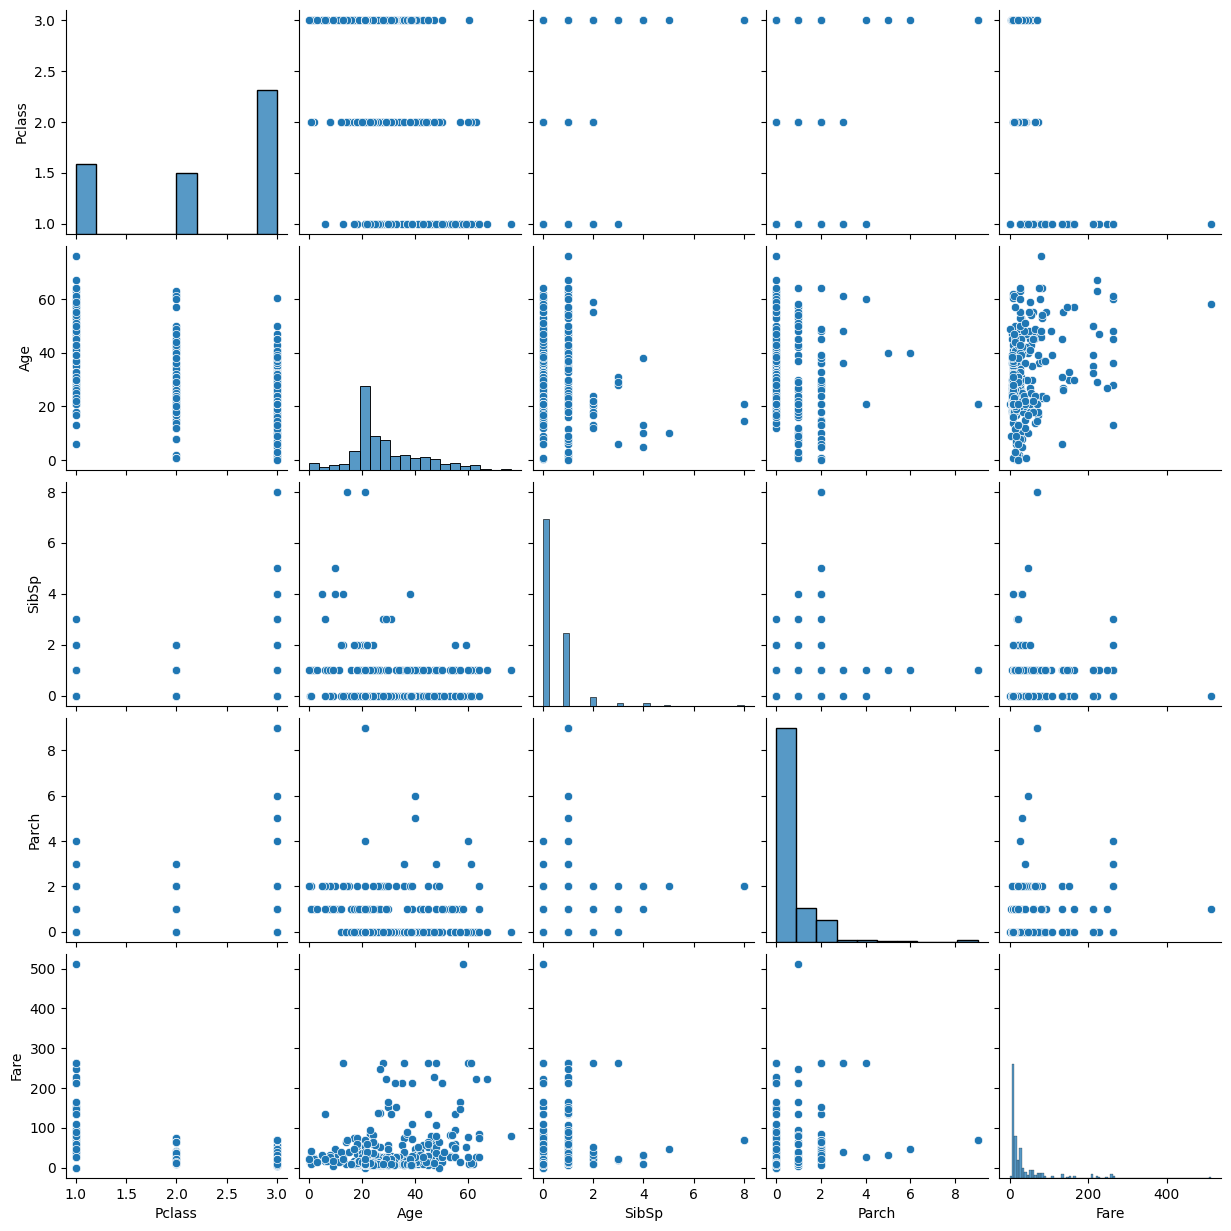

In [ ]:
sns.pairplot(test_set)

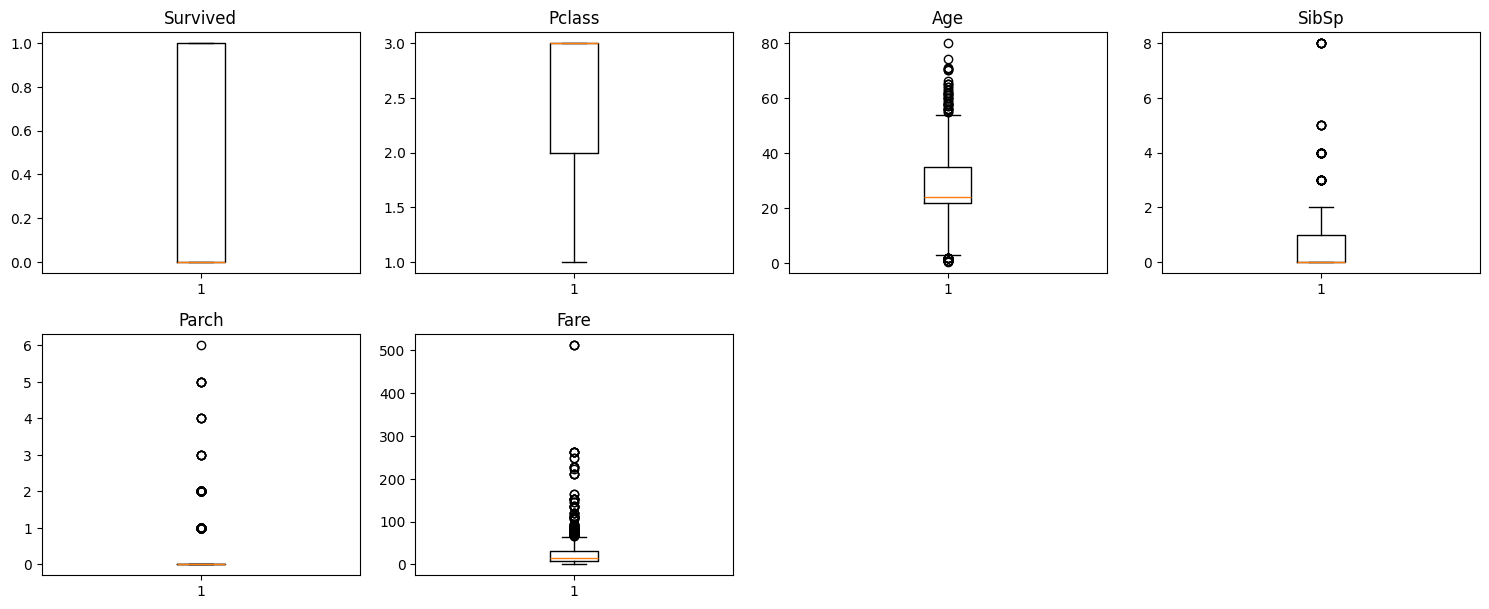

In [ ]:
plt.figure(figsize=(15,12))
for i, variable in enumerate(col):
  plt.subplot(4,4,i+1)
  plt.boxplot(train_set[variable])
  plt.tight_layout()
  plt.title(variable)
plt.show()

**Observations**

There are outliers present in age, SibSp, Parch and Fare. However, these seems to be genuine values, therefore, will not treat outliers.

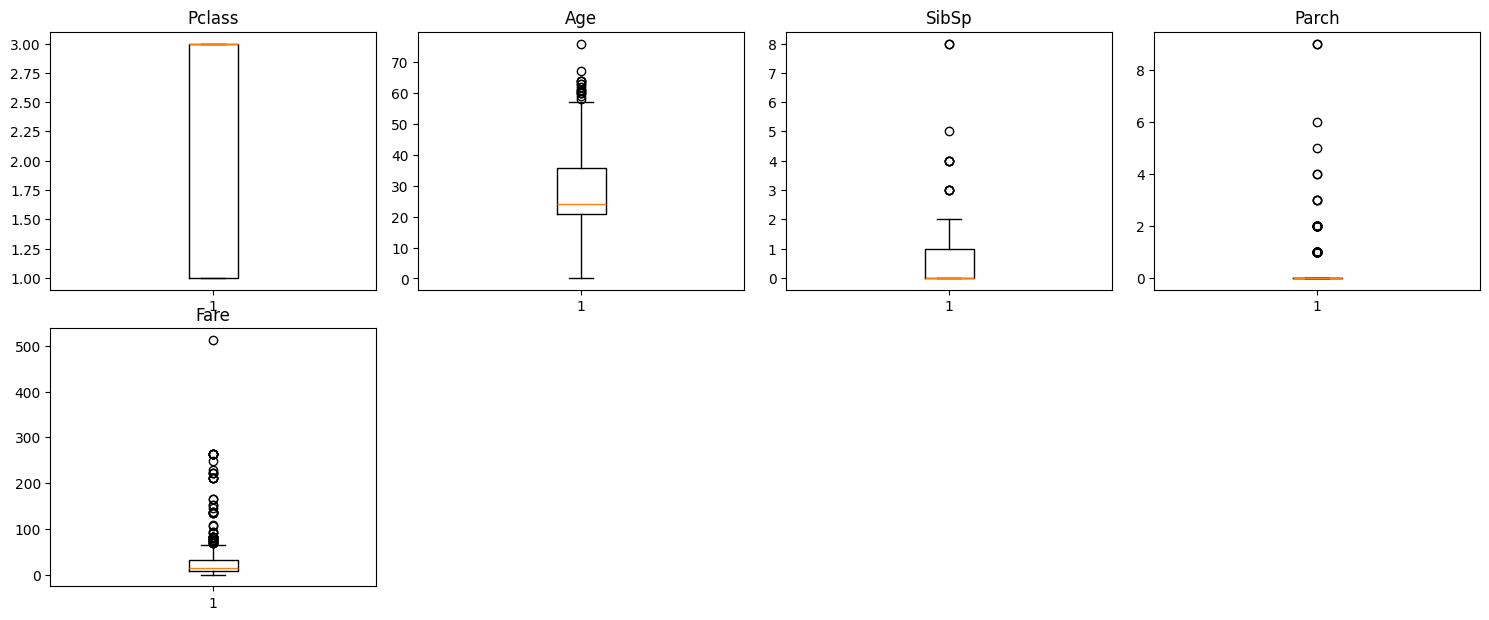

In [ ]:
plt.figure(figsize=(15,12))
for i, variable in enumerate(cols):
  plt.subplot(4,4,i+1)
  plt.boxplot(test_set[variable])
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [ ]:
train_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
train_set['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

**Observations**

Replacing male and female with 0 and 1 values; C,Q, S with 0,1,2.

In [ ]:
train_set['Sex']=train_set['Sex'].replace({'male':0,'female':1})
train_set['Embarked']=train_set['Embarked'].replace({'C':0,'Q':1,'S':2})
test_set['Sex']=test_set['Sex'].replace({'male':0,'female':1})
test_set['Embarked']=test_set['Embarked'].replace({'C':0,'Q':1,'S':2})

<ipython-input-20-f713ae0f9eb3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['Sex']=train_set['Sex'].replace({'male':0,'female':1})
<ipython-input-20-f713ae0f9eb3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['Embarked']=train_set['Embarked'].replace({'C':0,'Q':1,'S':2})
<ipython-input-20-f713ae0f9eb3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

In [ ]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


**Model Building**

In [ ]:
x=train_set.drop('Survived',axis=1)
y=train_set['Survived']

In [ ]:
print(x.head())
print(y.head())

   Pclass                                               Name  Sex   Age  \
0       3                            Braund, Mr. Owen Harris    0  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
2       3                             Heikkinen, Miss. Laina    1  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
4       3                           Allen, Mr. William Henry    0  35.0   

   SibSp  Parch            Ticket     Fare  Embarked  
0      1      0         A/5 21171   7.2500         2  
1      1      0          PC 17599  71.2833         0  
2      0      0  STON/O2. 3101282   7.9250         2  
3      1      0            113803  53.1000         2  
4      0      0            373450   8.0500         2  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
x=pd.get_dummies(x, columns=x.select_dtypes(include=['object','category']).columns.tolist(), drop_first=True)

In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,3,0,22.0,1,0,7.2500,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,38.0,1,0,71.2833,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,35.0,1,0,53.1000,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,0,35.0,0,0,8.0500,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
y.value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


**Observations**

In train set, 549 people did not suvived and 342 survived or 61.6% did not survived and 38.3% survived.

This is imbalanced dataset. Therefore, will use stratify=y.

**Splitting the train.csv dataset into train and test set.**

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)

**Function to measure different metrics of models.**

In [ ]:
def model_performance(model,predictors, target):
  pred=model.predict(predictors)

  acc=accuracy_score(target, pred)
  recall=recall_score(target, pred)
  precision=precision_score(target, pred)
  f1=f1_score(target, pred)

  df_perf=pd.DataFrame(
      {
          'Accuracy':acc,
          'Recall':recall,
          'Precision':precision,
          'f1':f1
      },
      index=[0],
  )
  return df_perf

**Function to plot confusion matrix showing predicted and true values.**

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred=model.predict(predictors)
    cm=confusion_matrix(target,y_pred)
    labels= np.array(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item/cm.flatten().sum())]
          for item in cm.flatten()
      ]
     ).reshape(2,2)

    plt.figure(figsize=(10,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

False negative: Predicted passenger did not survived but in actual he survived. As prediction was did not survived, it was shosking for the family member of passenger but it actual he survived. This can cause sadness for family members of passengers.

False positive: Predicted passenger survived but in actual he did not. There was hope for family taht their family member survived but in reality he did not. This can cause sadness for family member after knowing the truth.

Recall focus FN and precision on FP, however, both FN and FP are important, therefore, will focus on f1 score.



Decision Tree Performance on training data:
    Accuracy  Recall  Precision   f1
0       1.0     1.0        1.0  1.0
Decision Tree Performance on test data:
    Accuracy    Recall  Precision        f1
0  0.783582  0.669903   0.741935  0.704082


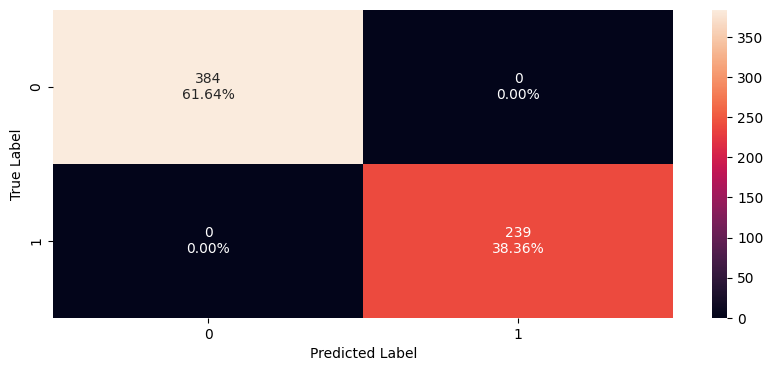

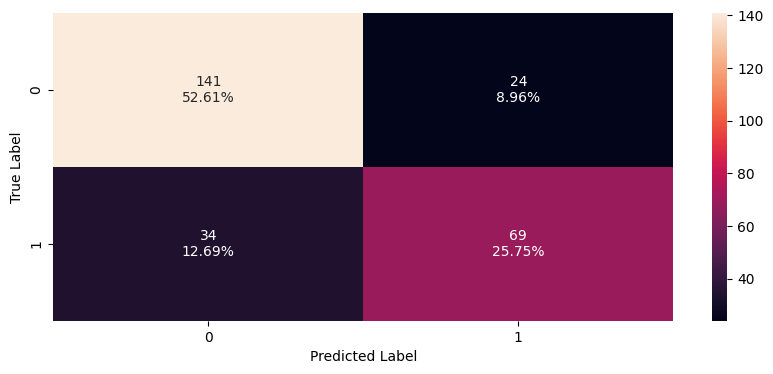

In [ ]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

dtree_model_train=model_performance(dtree, x_train, y_train)
print("Decision Tree Performance on training data:\n", dtree_model_train)
dtree_model_test=model_performance(dtree, x_test, y_test)
print("Decision Tree Performance on test data:\n", dtree_model_test)

confusion_matrix_sklearn(dtree, x_train, y_train)
confusion_matrix_sklearn(dtree, x_test, y_test)



**Observations**

As per decision tree, f1 score for train set is 100% and test set is 70.4%. It means there is overfitting present.

In [ ]:
dtree_estimator=DecisionTreeClassifier(class_weight={0:0.38, 1:0.62}, random_state=42)

parameters= {'max_depth':np.arange(2,6),
             'min_samples_leaf':[50,75,150,250],
             'max_leaf_nodes':[10,15],
             'min_samples_split':[10,30,50,70],
             'min_impurity_decrease':[0.0001,0.001]
             }

scorer=metrics.make_scorer(metrics.f1_score)

grid_obj=GridSearchCV(dtree_estimator,parameters, scoring= scorer,n_jobs=-1)
grid_obj=grid_obj.fit(x_train,y_train)

dtree_estimator=grid_obj.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.38, 1: 0.62}, max_depth=np.int64(2),
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=50, min_samples_split=10,
                       random_state=42)

Decision Tree Performance on training data:
    Accuracy    Recall  Precision        f1
0  0.791332  0.682008   0.751152  0.714912
Decision Tree Performance on test data:
    Accuracy    Recall  Precision   f1
0  0.776119  0.679612   0.721649  0.7


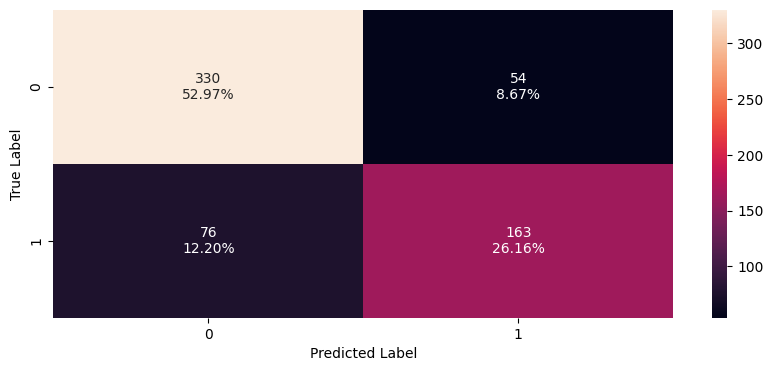

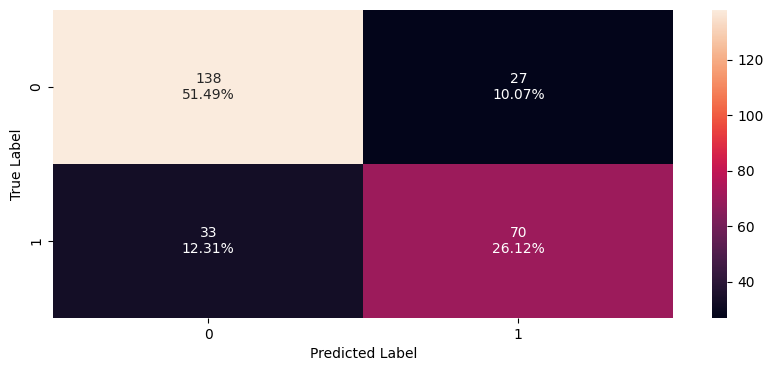

In [ ]:
dtree_estimator_model_train=model_performance(dtree_estimator, x_train, y_train)
print("Decision Tree Performance on training data:\n", dtree_estimator_model_train)
dtree_estimator_model_test=model_performance(dtree_estimator, x_test, y_test)
print("Decision Tree Performance on test data:\n", dtree_estimator_model_test)

confusion_matrix_sklearn(dtree_estimator, x_train, y_train)
confusion_matrix_sklearn(dtree_estimator, x_test, y_test)

**Observations**

As per decision tree estimator, f1 score of train set is 71.4% and test set is 70%.

Random Forest Performance on training data:
    Accuracy  Recall  Precision   f1
0       1.0     1.0        1.0  1.0
Random Forest Performance on test data:
    Accuracy    Recall  Precision        f1
0   0.80597  0.631068   0.822785  0.714286


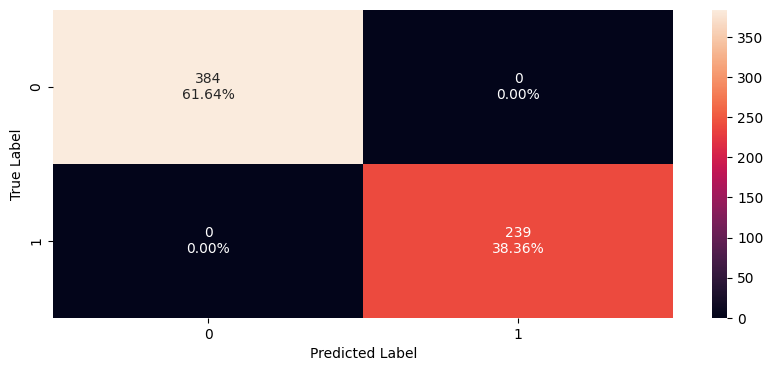

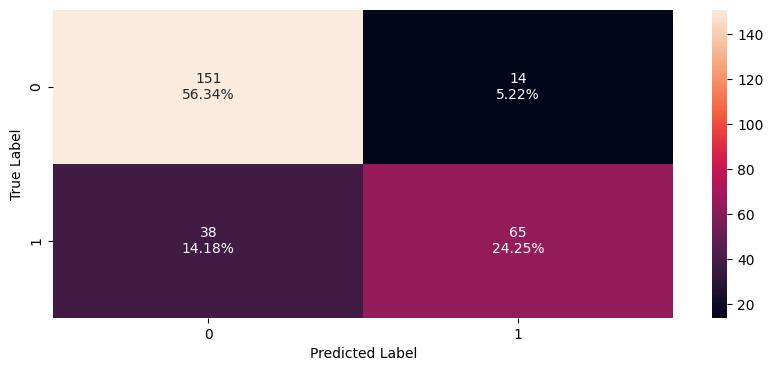

In [ ]:
rf_estimator=RandomForestClassifier(random_state=42)
rf_estimator.fit(x_train, y_train)

rf_estimator_model_train=model_performance(rf_estimator, x_train, y_train)
print("Random Forest Performance on training data:\n", rf_estimator_model_train)
rf_estimator_model_test=model_performance(rf_estimator, x_test, y_test)
print("Random Forest Performance on test data:\n", rf_estimator_model_test)

confusion_matrix_sklearn(rf_estimator, x_train, y_train)
confusion_matrix_sklearn(rf_estimator, x_test, y_test)

**Observations**

As per random forest, f1 score of train set is 100% and test set is 71.4%.

In [ ]:
rf_tuned=RandomForestClassifier(class_weight={0:0.38, 1:0.62}, random_state=42, oob_score=True, bootstrap=True)

parameters={
              'n_estimators':[21,51,61,75,101],
               'max_depth':np.arange(2,6),
               'min_samples_leaf':[50,75,150,250],
               'max_features':[0.3,0.6,0.1],
                'max_samples':[0.4,0.7,0.1]
}

scorer=metrics.make_scorer(metrics.f1_score)

grid_obj=GridSearchCV(rf_tuned,parameters, scoring= scorer,n_jobs=-1)
grid_obj=grid_obj.fit(x_train,y_train)

rf_tuned=grid_obj.best_estimator_

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.38, 1: 0.62}, max_depth=np.int64(2),
                       max_features=0.3, max_samples=0.4, min_samples_leaf=50,
                       n_estimators=61, oob_score=True, random_state=42)

In [ ]:
rf_tuned_model_train=model_performance(rf_tuned, x_train, y_train)
print("Random Forest Performance on training data:\n", rf_tuned_model_train)
rf_tuned_model_test=model_performance(rf_tuned, x_test, y_test)
print("Random Forest Performance on test data:\n", rf_tuned_model_test)

Random Forest Performance on training data:
    Accuracy    Recall  Precision       f1
0  0.733547  0.799163   0.618123  0.69708
Random Forest Performance on test data:
    Accuracy    Recall  Precision        f1
0  0.712687  0.825243   0.590278  0.688259


**Observations**

As per random forest tuned model, f1 score for train set is 69.7% and test set is 68.8%.

   Accuracy    Recall  Precision        f1
0  0.972713  0.953975   0.974359  0.964059
   Accuracy    Recall  Precision        f1
0  0.809701  0.640777      0.825  0.721311


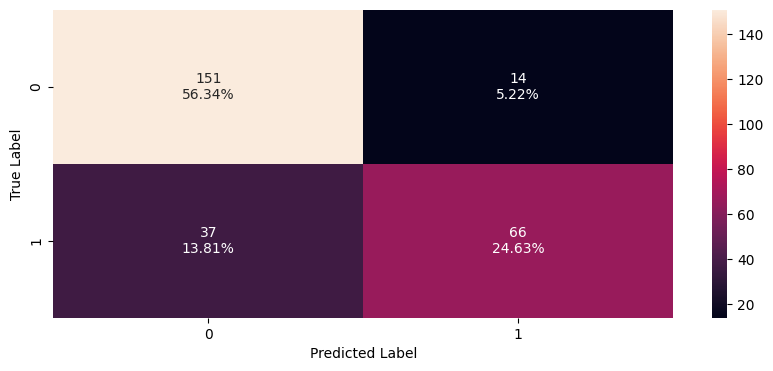

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(x_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance(bagging_classifier,x_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance(bagging_classifier,x_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,x_test,y_test)

**Observations**

As per bagging classifier, f1 score for train set is 96.4% and test set is 72.1%.

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=30,
                  random_state=1)

   Accuracy    Recall  Precision        f1
0  0.995185  0.987448        1.0  0.993684
   Accuracy    Recall  Precision       f1
0   0.80597  0.650485   0.807229  0.72043


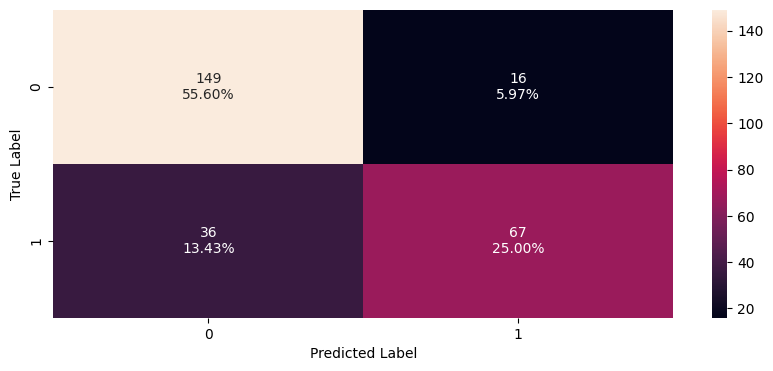

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance(bagging_estimator_tuned,x_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance(bagging_estimator_tuned,x_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,x_test,y_test)

**Observations**

As per bagging estimator, f1 score for train set is 99.3% and test set is 72.04%.

   Accuracy    Recall  Precision        f1
0  0.813804  0.736402   0.768559  0.752137
   Accuracy    Recall  Precision        f1
0  0.809701  0.737864       0.76  0.748768


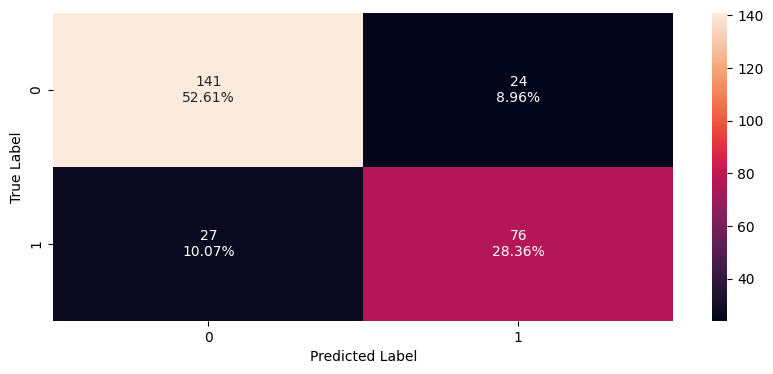

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance(ab_classifier,x_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance(ab_classifier,x_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,x_test,y_test)

**Observations**

As per AdaBoost Classifier, f1 score for train set is 75.2% and test set is 74.8%.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
              "n_estimators": np.arange(50,110,25),
              "learning_rate": [0.01,0.1,0.05],
              "estimator": [
               DecisionTreeClassifier(max_depth=2, random_state=1),
               DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=np.int64(100),
                   random_state=1)

   Accuracy    Recall  Precision        f1
0  0.837881  0.707113      0.845  0.769932
   Accuracy    Recall  Precision        f1
0  0.802239  0.631068     0.8125  0.710383


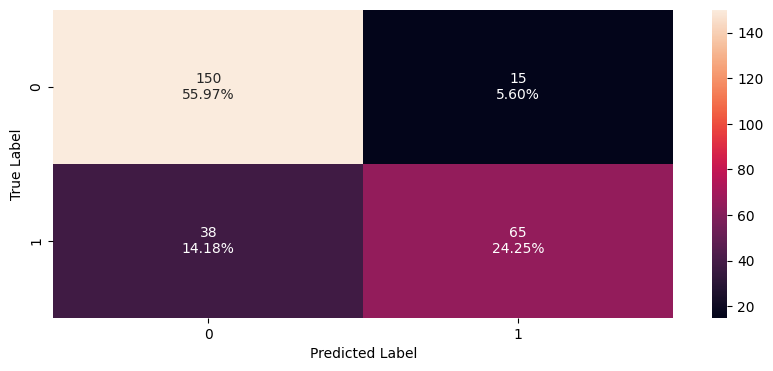

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance(abc_tuned,x_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance(abc_tuned,x_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,x_test,y_test)

**Observations**

As per Ada Boosting tuned model, f1 score for train set is 76.9% and test set is 71.0%.

Training performance:
    Accuracy    Recall  Precision        f1
0  0.861958  0.732218   0.888325  0.802752
Testing performance:
    Accuracy    Recall  Precision        f1
0  0.813433  0.650485    0.82716  0.728261


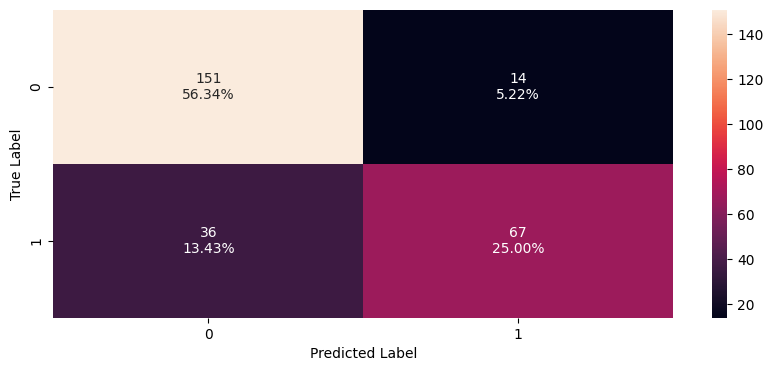

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance(gb_classifier,x_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance(gb_classifier,x_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,x_test,y_test)

**Observations**

As per gradient boosting classifier, f1 score for train set is 80.2% and test set is 72.8%.

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
               "n_estimators": np.arange(50,110,25),
               "learning_rate": [0.01,0.1,0.05],
               "subsample":[0.7,0.9],
               "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, n_estimators=np.int64(75),
                           random_state=1, subsample=0.7)

Training performance:
    Accuracy    Recall  Precision        f1
0  0.868379  0.740586   0.898477  0.811927
Testing performance:
    Accuracy    Recall  Precision        f1
0  0.802239  0.640777   0.804878  0.713514


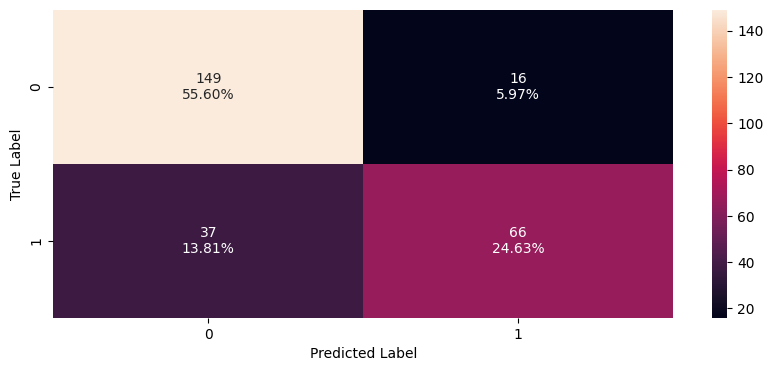

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance(gbc_tuned,x_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance(gbc_tuned,x_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,x_test,y_test)

**Observations**

As per Gradient Boosting tuned model, f1 score for train set is 81.1% and test set is 71.3%.

Training performance:
    Accuracy    Recall  Precision       f1
0  0.969502  0.933054   0.986726  0.95914
Testing performance:
    Accuracy    Recall  Precision        f1
0  0.783582  0.669903   0.741935  0.704082


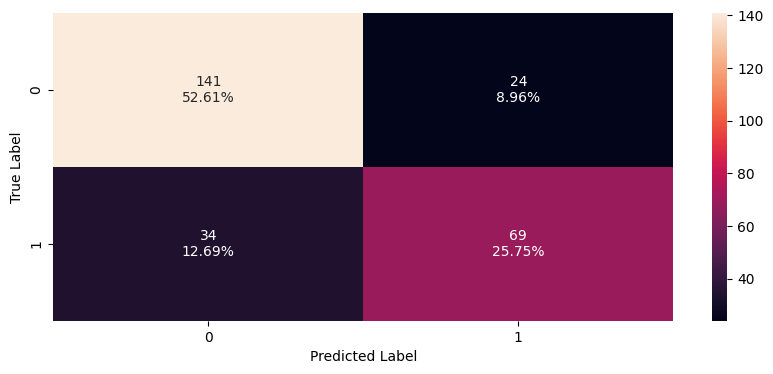

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(x_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance(xgb_classifier,x_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance(xgb_classifier,x_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,x_test,y_test)

**Observations**

As per XG Boosting, f1 score for train set is 95.9% and test set is 70.4%.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        f1
0  0.857143  0.861925    0.78626  0.822355
Testing performance:
    Accuracy    Recall  Precision        f1
0  0.783582  0.757282   0.702703  0.728972


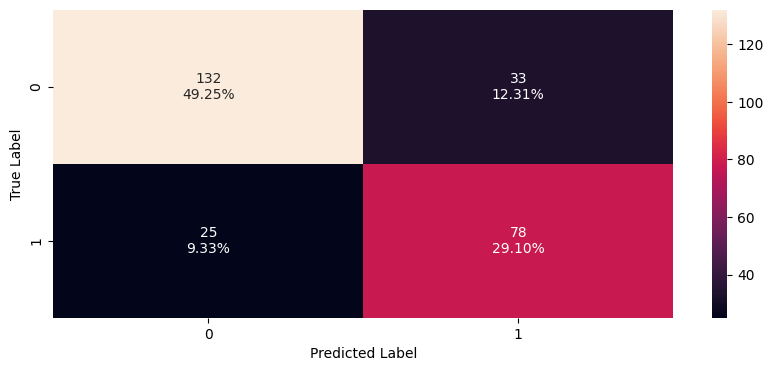

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance(xgb_tuned,x_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance(xgb_tuned,x_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,x_test,y_test)

**Observations**

As per XGB tuned model, f1 score for train set is 82.2% and test set is 72.8%.

In [ ]:
models_train_comparison=pd.concat([dtree_model_train.T,dtree_estimator_model_train.T,rf_estimator_model_train.T, rf_tuned_model_train.T,
                                   bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T], axis=1)

models_train_comparison.columns=[ "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Training Performance Comparison:\n",models_train_comparison)

Training Performance Comparison:
            Decision Tree  Decision Tree Estimator  Random Forest Estimator  \
Accuracy             1.0                 0.791332                      1.0   
Recall               1.0                 0.682008                      1.0   
Precision            1.0                 0.751152                      1.0   
f1                   1.0                 0.714912                      1.0   

           Random Forest Tuned  Bagging Classifier  Bagging Estimator Tuned  \
Accuracy              0.733547            0.972713                 0.995185   
Recall                0.799163            0.953975                 0.987448   
Precision             0.618123            0.974359                 1.000000   
f1                    0.697080            0.964059                 0.993684   

           Adaboost Classifier  Adabosst Classifier Tuned  \
Accuracy              0.813804                   0.837881   
Recall                0.736402                   0.707113

In [ ]:
models_test_comparison=pd.concat([dtree_model_test.T,dtree_estimator_model_test.T,rf_estimator_model_test.T, rf_tuned_model_test.T,bagging_classifier_model_test_perf.T,
                                   bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T], axis=1)

models_test_comparison.columns=[ "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier","XGBoost Classifier Tuned"]
print("Testing Performance Comparison:\n",models_test_comparison)

Testing Performance Comparison:
            Decision Tree  Decision Tree Estimator  Random Forest Estimator  \
Accuracy        0.783582                 0.776119                 0.794776   
Recall          0.660194                 0.679612                 0.640777   
Precision       0.747253                 0.721649                 0.785714   
f1              0.701031                 0.700000                 0.705882   

           Random Forest Tuned  Bagging Classifier  Bagging Estimator Tuned  \
Accuracy              0.720149            0.805970                 0.817164   
Recall                0.815534            0.631068                 0.669903   
Precision             0.600000            0.822785                 0.821429   
f1                    0.691358            0.714286                 0.737968   

           Adaboost Classifier  Adabosst Classifier Tuned  \
Accuracy              0.809701                   0.794776   
Recall                0.737864                   0.592233 

**Observations**

Decision Tree estimator, rf_tuned and adaboost classifier f1 score difference between training and test set is same. However, other metrics are more comparable with adaboost classifier. Therefore, will select adaboost classfier as final model.

**Now will make predictions for test.csv file only with AdaBoost Classifier.**

In [ ]:
test_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2


In [ ]:
test_set_name = test_set[['Name']].copy()
test_set_ticket = test_set[['Ticket']].copy()


**Creating a copy of Name and Ticket column before getting dummy variables.**

In [ ]:
# One-hot encode the test data using the same categories as the training data
test_set = pd.get_dummies(test_set, columns=test_set.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)

test_set = test_set.reindex(columns=ab_classifier.feature_names_in_, fill_value=0)

# Now you can make predictions
predictions_test = ab_classifier.predict(test_set)

In [ ]:
# Save predictions to a new CSV file
submission = pd.DataFrame({'Pclass': test_set['Pclass'], 'SibSp':test_set['SibSp'],'Fare':test_set['Fare'],'Parch':test_set['Parch'],'Sex':test_set['Sex'],'Age':test_set['Age'],
                           'Embarked':test_set['Embarked'],'Survived': predictions_test})  # Replace 'ID' with appropriate identifier column
#submission.to_csv('predictions.csv', index=False)


In [ ]:
submission.head()

,Pclass,SibSp,Fare,Parch,Sex,Age,Embarked,Survived
0,3,0,7.8292,0,0,34.5,1,0
1,3,1,7.0000,0,1,47.0,2,0
2,2,0,9.6875,0,0,62.0,1,0
3,3,0,8.6625,0,0,27.0,2,0
4,3,1,12.2875,1,1,22.0,2,1


In [ ]:
final_submission=pd.concat([test_set_PassengerID, submission['Survived']], axis=1)

In [ ]:
final_predictions = pd.concat([submission, test_set_name, test_set_ticket], axis=1)

In [ ]:
final_predictions.head()

,Pclass,SibSp,Fare,Parch,Sex,Age,Embarked,Survived,Name,Ticket
0,3,0,7.8292,0,0,34.5,1,0,"Kelly, Mr. James",330911
1,3,1,7.0000,0,1,47.0,2,0,"Wilkes, Mrs. James (Ellen Needs)",363272
2,2,0,9.6875,0,0,62.0,1,0,"Myles, Mr. Thomas Francis",240276
3,3,0,8.6625,0,0,27.0,2,0,"Wirz, Mr. Albert",315154
4,3,1,12.2875,1,1,22.0,2,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3101298


In [ ]:
final_predictions.shape

(418, 10)

In [ ]:
final_predictions['Survived'].value_counts()

,count
Survived,
0,249
1,169


In [ ]:
final_predictions['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.595694
1,0.404306


In [ ]:
final_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**Observations**

As per predictions for test.csv file, 249 people or 59.5% does not survived and 169 or 40.4% survived.

**Saving file as csv**

In [ ]:
final_submission.to_csv('final_submission.csv', index=False)